/Users/alexkim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


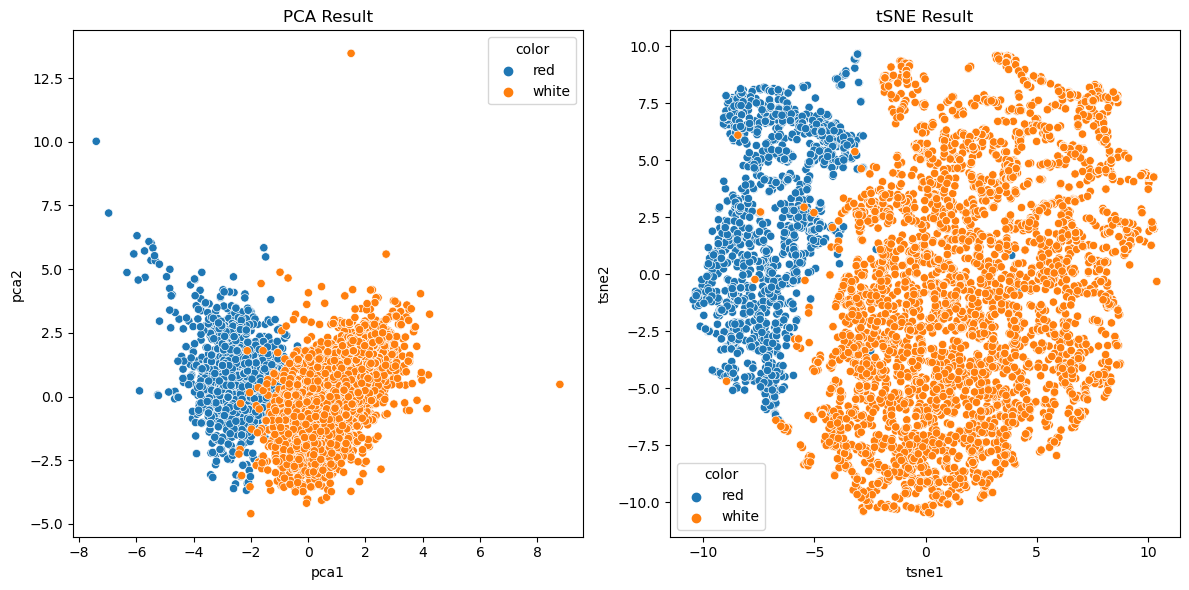

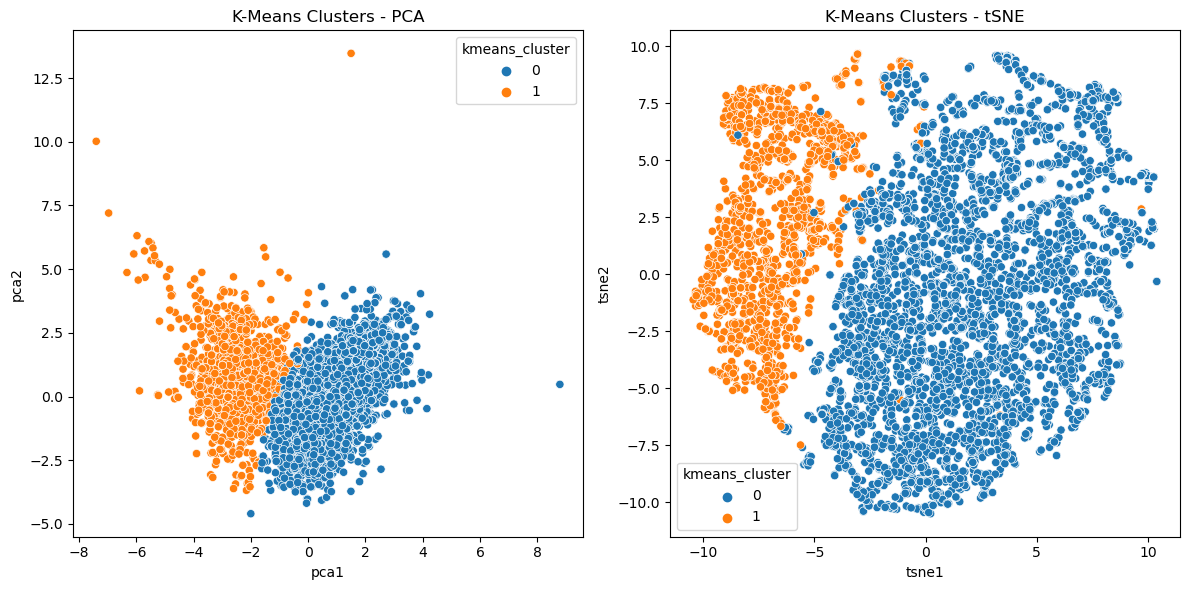

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the data
wine_data = pd.read_csv('wine.csv')

# Separate the features from the 'color' and 'quality' columns
features = wine_data.drop(['color', 'quality'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Perform tSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_result = kmeans.fit_predict(scaled_features)

# Add PCA and tSNE results to the DataFrame for visualization
wine_data['pca1'] = pca_result[:, 0]
wine_data['pca2'] = pca_result[:, 1]
wine_data['tsne1'] = tsne_result[:, 0]
wine_data['tsne2'] = tsne_result[:, 1]
wine_data['kmeans_cluster'] = kmeans_result

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='color', data=wine_data)
plt.title('PCA Result')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='color', data=wine_data)
plt.title('tSNE Result')

plt.tight_layout()
plt.show()

# Compare K-Means clusters with wine types and quality scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', data=wine_data)
plt.title('K-Means Clusters - PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='kmeans_cluster', data=wine_data)
plt.title('K-Means Clusters - tSNE')

plt.tight_layout()
plt.show()
